# Selective Search

## Selective Search 설치

In [1]:
!pip install selectivesearch

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4336 sha256=534c7b2b33138a78dd92279056b7e9d4b2bf805853667d7dd8aabf9e3ea40520
  Stored in directory: c:\users\wjdgu\appdata\local\pip\cache\wheels\dd\5d\c1\1f9a5d313a93983d5d76cd3f1a4adb286a17176e65c6f704cb
Successfully built selectivesearch



[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Image 확인하기

Shape: (655, 499, 3)


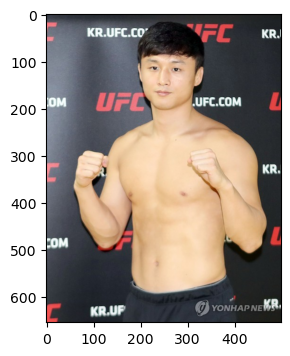

In [8]:
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

## 이미지 로드 및 시각화
## opencv는 이미지를 읽을 때 BGR로 읽으므로 보여줄때는 RGB로 변경해서 보여줘야 함.

image = cv2.cvtColor(cv2.imread('a.jpg'), cv2.COLOR_BGR2RGB)
## 해당 코드는 아래 코드와 동일한 내용임
##image = cv.imread('a.jpg')
## image = cv.cvtColor(image, cv2.COLOR_BGR2RGB)

print('Shape:',image.shape)
plt.figure(figsize=(26,4))
plt.imshow(image)
# plt.axis('off') -> 가로, 세로 축 제거
plt.show()

## Selective Search를 활용하여 Region Proposal 정보 보기

In [35]:
import selectivesearch

_, regions = selectivesearch.selective_search(image, scale=600, min_size=2000) 
# Sclae: 오브젝트 사이즈, min_size: 해당 사이즈 보다 넓이가 큰 bbox 추천
print(type(regions), len(regions))
# list 형태, 43개 bbox를 예측

<class 'list'> 23


## Region Proposal 정보 확인하기

- rect: 좌표(x시작좌표, y시작좌표, 너비, 높이)
- size: Object 크기
- labels: bbox 고유 ID
- 밑으로 갈수록 너비와 높이 값이 큰 하나의 bbox를 가지고 있으며 한 개 bbox에 여러개 오브젝트 있을 확률이 커짐

In [36]:
regions

[{'rect': (0, 0, 498, 632), 'size': 73070, 'labels': [0.0]},
 {'rect': (0, 11, 498, 643), 'size': 105987, 'labels': [1.0]},
 {'rect': (297, 15, 103, 48), 'size': 3250, 'labels': [2.0]},
 {'rect': (195, 16, 149, 114), 'size': 9400, 'labels': [3.0]},
 {'rect': (85, 23, 152, 169), 'size': 3364, 'labels': [4.0]},
 {'rect': (196, 88, 265, 336), 'size': 14666, 'labels': [5.0]},
 {'rect': (103, 162, 105, 47), 'size': 3848, 'labels': [6.0]},
 {'rect': (93, 177, 140, 240), 'size': 3607, 'labels': [7.0]},
 {'rect': (121, 187, 343, 400), 'size': 86546, 'labels': [8.0]},
 {'rect': (61, 274, 130, 223), 'size': 12029, 'labels': [9.0]},
 {'rect': (298, 285, 153, 133), 'size': 4913, 'labels': [10.0]},
 {'rect': (70, 399, 387, 216), 'size': 6165, 'labels': [11.0]},
 {'rect': (85, 23, 152, 186), 'size': 7212, 'labels': [4.0, 6.0]},
 {'rect': (196, 88, 265, 336), 'size': 19579, 'labels': [5.0, 10.0]},
 {'rect': (61, 177, 172, 320), 'size': 15636, 'labels': [7.0, 9.0]},
 {'rect': (61, 23, 176, 474), 'size

## Bounding Box 시각화 하기

### rect 정보만 출력하기

In [37]:
rects = [region['rect'] for region in regions]
print(rects)

[(0, 0, 498, 632), (0, 11, 498, 643), (297, 15, 103, 48), (195, 16, 149, 114), (85, 23, 152, 169), (196, 88, 265, 336), (103, 162, 105, 47), (93, 177, 140, 240), (121, 187, 343, 400), (61, 274, 130, 223), (298, 285, 153, 133), (70, 399, 387, 216), (85, 23, 152, 186), (196, 88, 265, 336), (61, 177, 172, 320), (61, 23, 176, 474), (195, 15, 205, 115), (61, 23, 400, 474), (61, 23, 403, 564), (61, 23, 403, 592), (0, 0, 498, 632), (0, 0, 498, 654), (0, 0, 498, 654)]


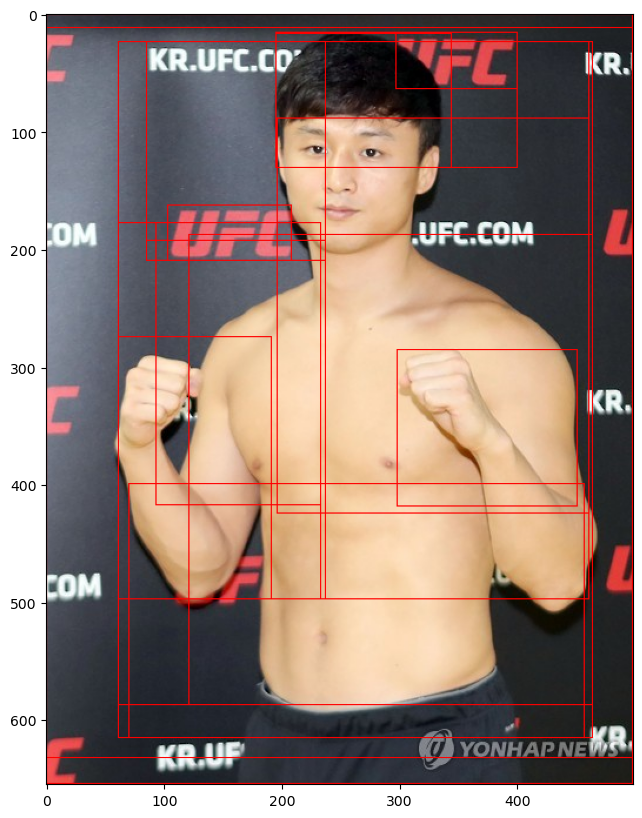

In [41]:
red_color = (255,0,0)
image_copy = image.copy()

for rect in rects:
    
    x1 = rect[0] # rect[0] x축 시작좌표
    y1 = rect[1] # rect[1] y축 시작좌표
    x2 = rect[0] + rect[2] # rect[3]은 좌표가 아닌 너비이므로 좌표가 되려면 (x축 시작좌표 + 너비 = x축 마지막 좌표)
    y2 = rect[1] + rect[3] # rect[4]은 좌표가 아닌 높이이므로 좌표가 되려면 (y축 시작좌표 + 높이 = y축 마지막 좌표)
    
    image_copy = cv2.rectangle(image_copy, (x1, y1), (x2, y2), color=red_color, thickness=1)
    

plt.figure(figsize=(10,10))
plt.imshow(image_copy)
plt.show()

## Bounding Box 크기가 큰 것만 추출

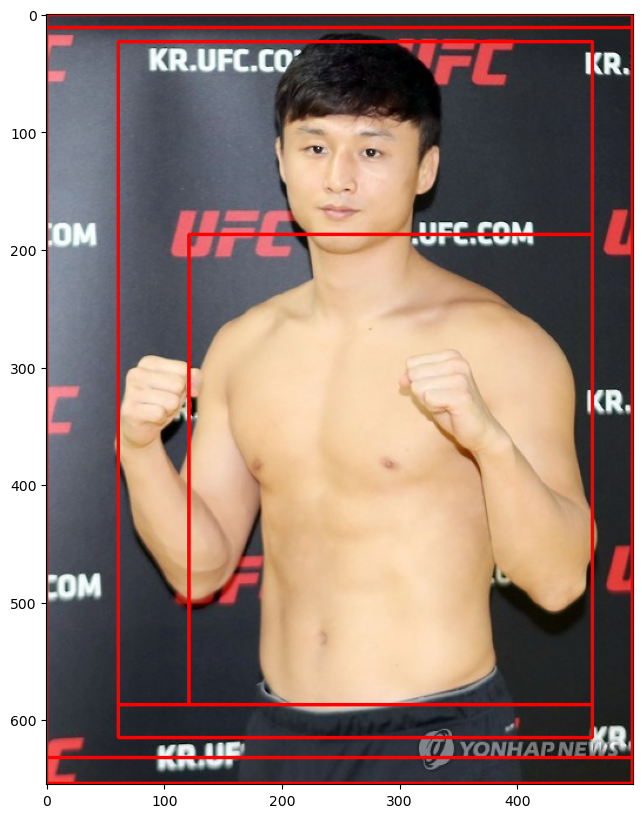

In [45]:
rects = [region['rect'] for region in regions if region['size'] > 50000]

red_color = (255,0,0)
image_copy = image.copy()

for rect in rects:
    
    x1 = rect[0] # rect[0] x축 시작좌표
    y1 = rect[1] # rect[1] y축 시작좌표
    x2 = rect[0] + rect[2] # rect[3]은 좌표가 아닌 너비이므로 좌표가 되려면 (x축 시작좌표 + 너비 = x축 마지막 좌표)
    y2 = rect[1] + rect[3] # rect[4]은 좌표가 아닌 높이이므로 좌표가 되려면 (y축 시작좌표 + 높이 = y축 마지막 좌표)
    
    image_copy = cv2.rectangle(image_copy, (x1, y1), (x2, y2), color=red_color, thickness=2)
    

plt.figure(figsize=(10,10))
plt.imshow(image_copy)
plt.show()

## IOU 함수 구현하기

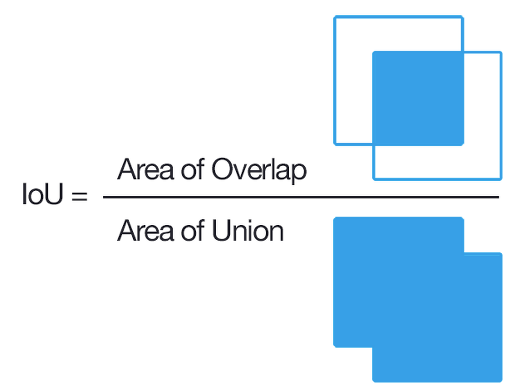

In [58]:
import numpy as np

def compute_iou(cand_box, gt_box):
    
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2]) # 좌표값으로 들어와야함(너비, 높이가 아닌)
    y2 = np.minimum(cand_box[3], gt_box[3]) # 좌표값으로 들어와야함(너비, 높이가 아닌)
    
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection
    
    iou = intersection / union
    return iou

## 실제 BBOX 이미지 

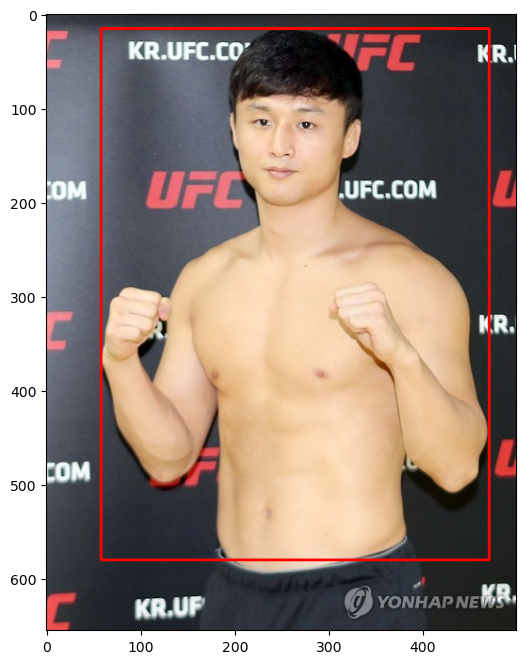

In [59]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


red_color = (255, 0 , 0)
gt_box = [58, 15, 470, 580]

image = cv2.cvtColor(cv2.imread('a.jpg'), cv2.COLOR_BGR2RGB)
img_copy = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red_color, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

## IOU 값 확인하기

In [61]:
rects = [cand['rect'] for cand in regions]
for index, cand_box in enumerate(rects):
    cand_box = list(cand_box)
    cand_box[2] = cand_box[2] + cand_box[0]
    cand_box[3] = cand_box[3] + cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    print('index:', index, "iou:", iou)

index: 0 iou: 0.7396039855625032
index: 1 iou: 0.7269513512838289
index: 2 iou: 0.021238938053097345
index: 3 iou: 0.07297018644213421
index: 4 iou: 0.110353123120543
index: 5 iou: 0.3825070882378211
index: 6 iou: 0.021200274937709426
index: 7 iou: 0.14434229744823437
index: 8 iou: 0.5731713021034862
index: 9 iou: 0.12453819056619984
index: 10 iou: 0.08741730389208695
index: 11 iou: 0.2843682127270882
index: 12 iou: 0.12145373313858579
index: 13 iou: 0.3825070882378211
index: 14 iou: 0.23644643010567917
index: 15 iou: 0.3583813042357591
index: 16 iou: 0.10127588280780135
index: 17 iou: 0.8145029641721797
index: 18 iou: 0.9527591139256625
index: 19 iou: 0.9092127913806023
index: 20 iou: 0.7396039855625032
index: 21 iou: 0.7147243407882293
index: 22 iou: 0.7147243407882293


## 최종 정리

index: 3 iou: 0.9527591139256625 rectangle: (61, 23, 464, 587)
index: 4 iou: 0.9092127913806023 rectangle: (61, 23, 464, 615)


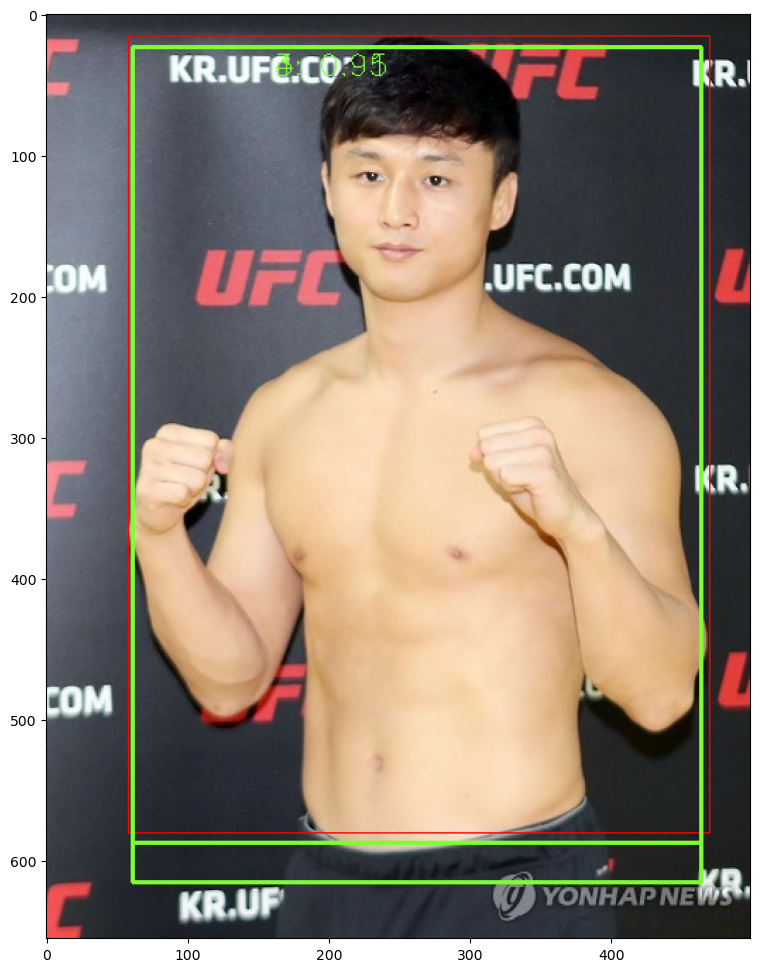

In [77]:
# 1. 이미지 불러오기
image = cv2.cvtColor(cv2.imread('a.jpg'), cv2.COLOR_BGR2RGB) 

# 2. 실제 정답 박스 구현하기
red_color = (255, 0 , 0) 
gt_box = [58, 15, 470, 580]

# 3. Selective_search()로 나온 값 정리하기
green_color = (125, 255, 51)
rects = [region['rect'] for region in regions if region['size'] > 50000]

img_copy = cv2.rectangle(image, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red_color, thickness=1)

for index, cand_box in enumerate(rects):
    
    # cand_box[2], [3]은 너비 높이이므로 좌표값으로 바꿔주기 위해 해야하는 계산식
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    
    if iou > 0.9:
        print('index:', index, "iou:", iou, 'rectangle:',(cand_box[0], cand_box[1], cand_box[2], cand_box[3]) )
        cv2.rectangle(image, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green_color, thickness=2)
        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(image, text, (cand_box[0]+ 100, cand_box[1]+20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color=green_color, thickness=1)
    
plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.show()
    